In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
gold_data = pd.read_csv('gld_price_data.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
sns.set_style('whitegrid')

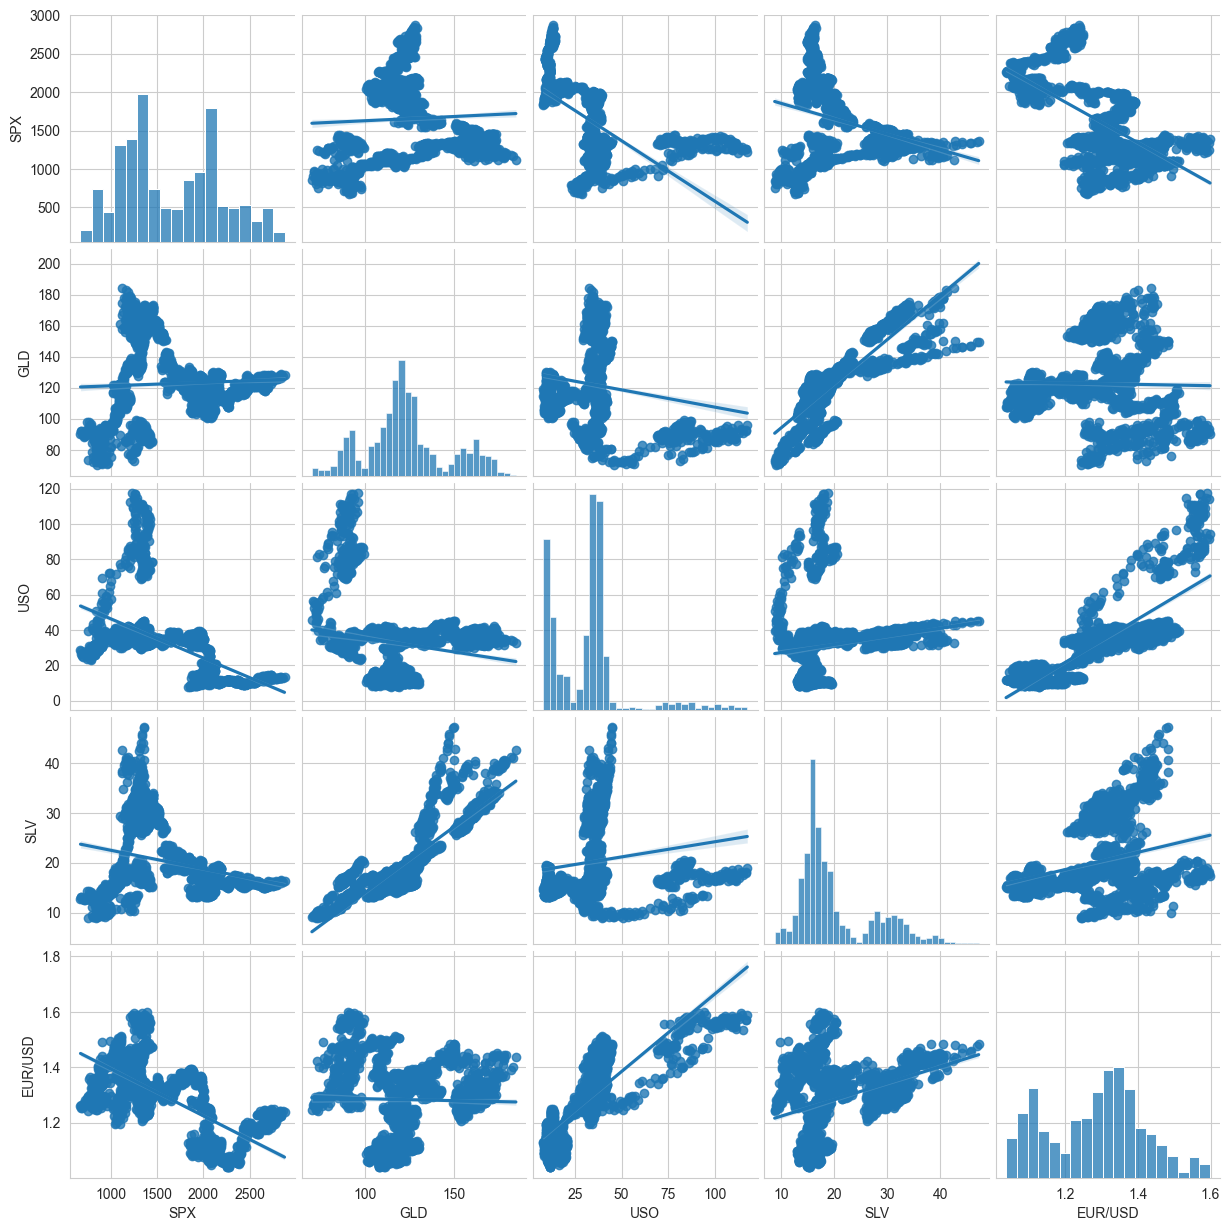

In [12]:
sns.pairplot(data=gold_data,kind='reg')

<Axes: xlabel='GLD', ylabel='Density'>

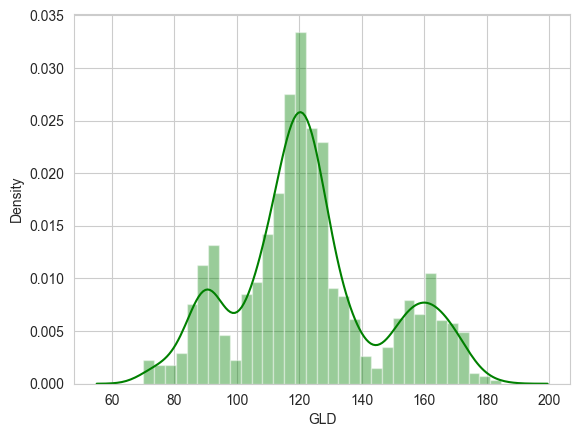

In [13]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

Splitting the Features and Target

In [14]:
gold_data.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [15]:
target=gold_data['GLD']
features=gold_data.drop(['Date','GLD'],axis=1)

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(
    features,target,test_size=0.25,random_state=101
)

Model Training

In [17]:
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression().fit(xtrain,ytrain)

In [18]:
print('Linear Model (Train): ', round(model_linear.score(xtrain,ytrain)*100,1),'%')
print('Linear Model (Test): ', round(model_linear.score(xtest,ytest)*100,1),'%')


Linear Model (Train):  88.0 %
Linear Model (Test):  88.6 %


Improving the model

In [19]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor().fit(xtrain,ytrain)


In [20]:
print('Decision Tree (Train): ', round(model_dt.score(xtrain,ytrain)*100,1),'%')
print('Decision Tree (Test): ', round(model_dt.score(xtest,ytest)*100,1),'%')

Decision Tree (Train):  100.0 %
Decision Tree (Test):  97.8 %


In [21]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor().fit(xtrain,ytrain)

In [22]:
print('RF Model (Train): ', round(model_rf.score(xtrain,ytrain)*100,1),'%')
print('RF Model (Test): ', round(model_rf.score(xtest,ytest)*100,1),'%')

RF Model (Train):  99.8 %
RF Model (Test):  99.0 %


Model Evaluation

In [23]:
# prediction on Test Data
test_data_prediction = model_rf.predict(xtest)

In [24]:
print(test_data_prediction)

[127.08619889 105.26249952 121.77379992 125.58839917 114.76980015
 118.86059992 154.85929937 122.69489882  99.05929903 125.60549966
 114.73890042 117.1503009  156.36229918 118.05459898 118.20669926
  92.07249971 167.8516973  124.62099951 115.11909965 172.0728015
 149.89250112 118.06410076 129.1631989  121.87849933 128.25730344
  89.8005004  119.28560113  90.54480141 120.64959897 125.57010215
  98.08359723 158.75020151 156.02479973 120.60620106 122.96569988
 148.33930127  96.69640034 114.34549952 161.5552023  116.55800058
 120.2896012  125.52080048 157.25989971 118.23710135 126.03279961
 115.02170032  86.52149918 106.91360002 115.90640098 124.97780198
 138.55950026  92.42109856 107.56120077 144.54280094 116.94470163
 155.30370365 120.38319887 165.46270138 162.1029016  131.65259813
 107.51129882 147.94109978 160.71499972  93.81229916 109.64800017
 116.01410066 121.14790047 110.62199918 119.76410189 127.45209812
  90.52099985 124.33570043 157.09730018 149.4742043   91.613799
 123.90909993

Compare the Actual Values and Predicted Values in a Plot

In [25]:
Y_test = list(ytest)

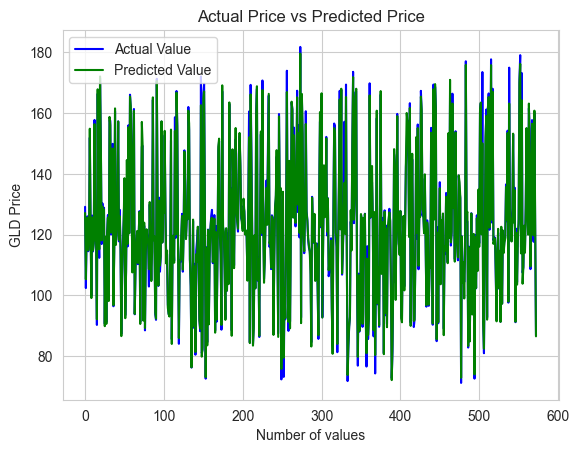

In [26]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [27]:
query_data={
    'SPX':[1447],
    'USO':[78],
    'SLV':[15],
    'EUR/USD':[1.47]
}
result=model_rf.predict(pd.DataFrame(query_data))
print(result[0])

85.37409867999999


Creating a pickle file

In [28]:
pd.to_pickle(model_rf,'GoldPricePredictor.pickle')